In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid

In [2]:
# Eq 0
ds_eq0= xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/linear_d2_prog__5706_200.nc", decode_times=False)
# No curl
ds_curl0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq4/new/linear_d2_prog__4208_045.nc", decode_times=False)
#0.03
ds_eq3 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq3/linear_d2_prog__3208_295.nc", decode_times=False)
#0.02
ds_eq2 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq2/linear_d2_prog__4303_021.nc", decode_times=False)

# S02 files
# Eq 0
ds_seq0= xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/linear_d2_prog__5308_170.nc", decode_times=False)
# No curl
ds_scurl0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/linear_d2_prog__5607_060.nc", decode_times=False)
#0.03
ds_seq3 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/linear_d2_prog__5607_060.nc", decode_times=False)
#0.02
ds_seq2 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/linear_d2_prog__4911_274.nc", decode_times=False)

ds_seq0_wind = xr.open_dataset("/media/sanjana/T7 Shield/Code/south_winds/new_old_wind.nc")
ds_seq2_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/INPUT/0.02winds.nc")
ds_seq3_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/INPUT/0.03winds.nc")
ds_scurl0_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/INPUT/no_curl_and_south.nc")
ds_eq0_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/INPUT/wind_sample_nov_10.nc")
ds_eq2_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq2/INPUT/new_wind.nc")
ds_eq3_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq3/INPUT/wind_eq3.nc")
ds_eq4_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq4/INPUT/no_curl_no_south.nc")


#geometry
geo = xr.open_dataset('/media/sanjana/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
geo = geo.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset

In [3]:

heat_seq0 = ((ds_seq0.isel(Time=-1).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)
heat_scurl0 = ((ds_scurl0.isel(Time=-1).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)
heat_seq3 = ((ds_seq3.isel(Time=-1).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)
heat_seq2 = ((ds_seq2.isel(Time=2).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)

heat_eq0 = ((ds_eq0.isel(Time=-1).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)
heat_eq4 = ((ds_curl0.isel(Time=-1).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)
heat_eq3 = ((ds_eq3.isel(Time=-1).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)
heat_eq2 = ((ds_eq2.isel(Time=2).net_heat_surface * geo.Ah).sum(dim='xh').cumsum('yh'))*10**(-15)


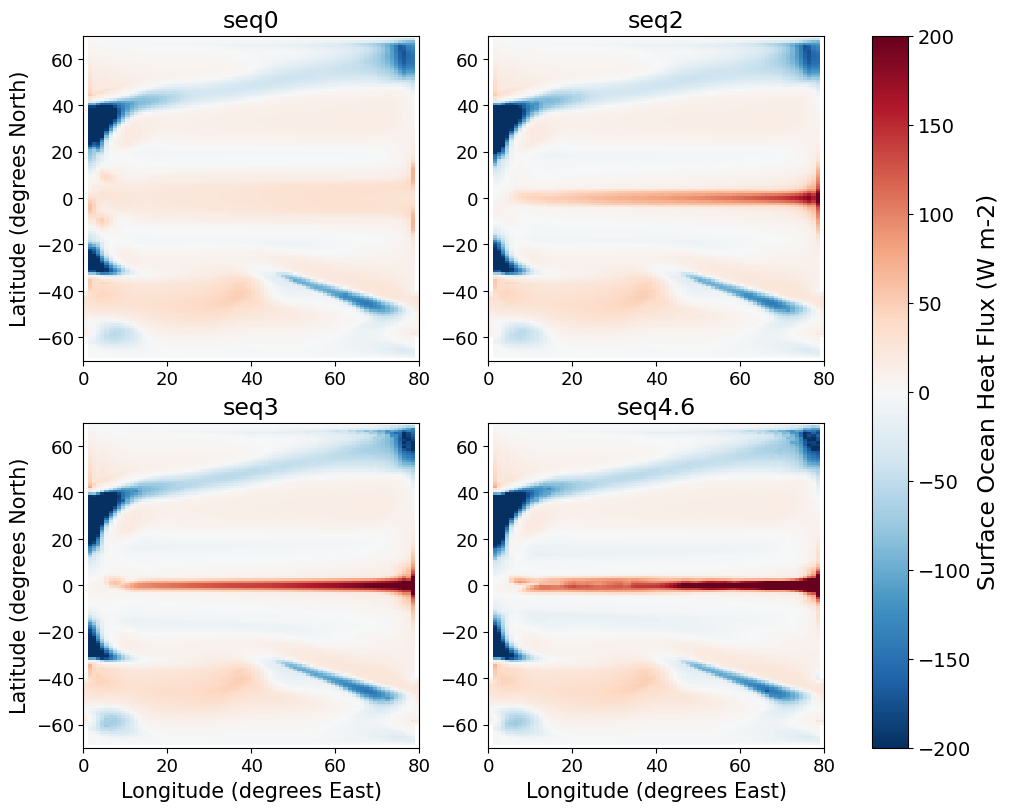

In [27]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(10,8))
contours=[
ds_seq0.isel(Time=-1).net_heat_surface.plot(ax=ax[0,0],vmax=200, add_colorbar=False),
ds_seq2.isel(Time=-1).net_heat_surface.plot(ax=ax[0,1],vmax=200, add_colorbar=False),
ds_seq3.isel(Time=-1).net_heat_surface.plot(ax=ax[1,0],vmax=200, add_colorbar=False),
ds_scurl0.isel(Time=-1).net_heat_surface.plot(ax=ax[1,1],vmax=200, add_colorbar=False)]

ax[0,0].set_title("seq0", fontsize=17)
ax[0,1].set_title("seq2", fontsize=17)
ax[1,1].set_title("seq4.6", fontsize=17)
ax[1,0].set_title("seq3", fontsize=17)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Longitude (degrees East)", fontsize = 15)
ax[1,1].set_xlabel("Longitude (degrees East)", fontsize = 15)


ax[0,0].set_ylabel("Latitude (degrees North)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_ylabel('')

# Add a common colorbar
cbar = fig.colorbar(contours[2], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Surface Ocean Heat Flux (W m-2)', fontsize=17)  # Set the colorbar title

plt.savefig('surfaceflux.png')


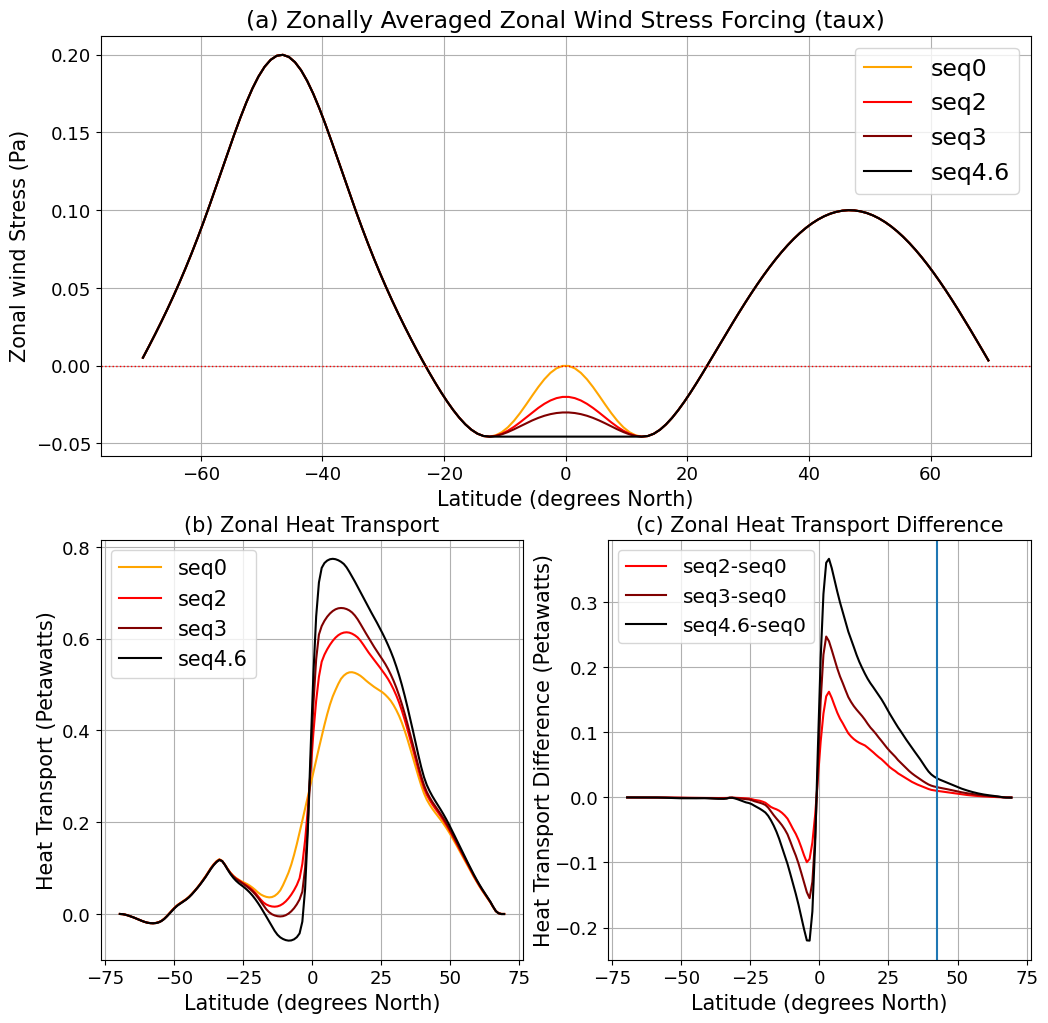

In [19]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[0.8, 0.8], height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ds_seq0_wind.taux.isel(xq=3).plot(ax=ax1,color='orange', label='seq0')
ds_seq2_wind.taux.isel(xq=3).plot(ax=ax1,color='red', linestyle='-', label='seq2')
ds_seq3_wind.taux.isel(xq=3).plot(ax=ax1,color='maroon', linestyle='-', label='seq3')
ds_scurl0_wind.taux.isel(xq=3).plot(ax=ax1,color='black', linestyle='-', label='seq4.6')

ax1.grid()
ax1.set_title('(a) Zonally Averaged Zonal Wind Stress Forcing (taux)', fontsize=17)
ax1.set_xlabel('Latitude (degrees North)', fontsize=15)
ax1.set_ylabel('Zonal wind Stress (Pa)', fontsize=15)
ax1.tick_params(axis='both', labelsize=13)

ax1.legend(fontsize=17)
ax1.axhline(y=0, color='red', linestyle=':', linewidth=1, label='y = 0')

ax2 = fig.add_subplot(gs[1, 0])

heat_seq0.plot(ax=ax2,label='seq0', color="orange")
heat_seq2.plot(ax=ax2,label='seq2', color="red", linestyle='-')
heat_seq3.plot(ax=ax2,label='seq3', color="maroon")
heat_scurl0.plot(ax=ax2,label='seq4.6', color="black", linestyle="-")

ax2.set_title('(b) Zonal Heat Transport', fontsize=15)
ax2.set_xlabel('Latitude (degrees North)', fontsize=15)
ax2.set_ylabel('Heat Transport (Petawatts)', fontsize=15)

ax2.tick_params(axis='both', labelsize=13)
ax2.legend(loc="upper left",fontsize=15)
ax2.grid()

ax3 = fig.add_subplot(gs[1, 1])

(heat_seq2-heat_seq0).plot(ax=ax3,color='red', label='seq2-seq0')
(heat_seq3-heat_seq0).plot(ax=ax3, color='maroon', label='seq3-seq0')
(heat_scurl0-heat_seq0).plot(ax=ax3, color='black',label='seq4.6-seq0')
# plt.axhline(y=0.1)
plt.axvline(x=42.5)

ax3.set_title('(c) Zonal Heat Transport Difference', fontsize=15)
ax3.set_xlabel('Latitude (degrees North)', fontsize=15)
ax3.set_ylabel('Heat Transport Difference (Petawatts)', fontsize=15, labelpad=0.1)
# ax3.yaxis.set_ticks_position('right')
# ax3.yaxis.set_label_position('right')

ax3.legend(loc="upper left",fontsize=14.5)
ax3.tick_params(axis='both', labelsize=13)
ax3.grid()

plt.savefig('heatandwind.png')


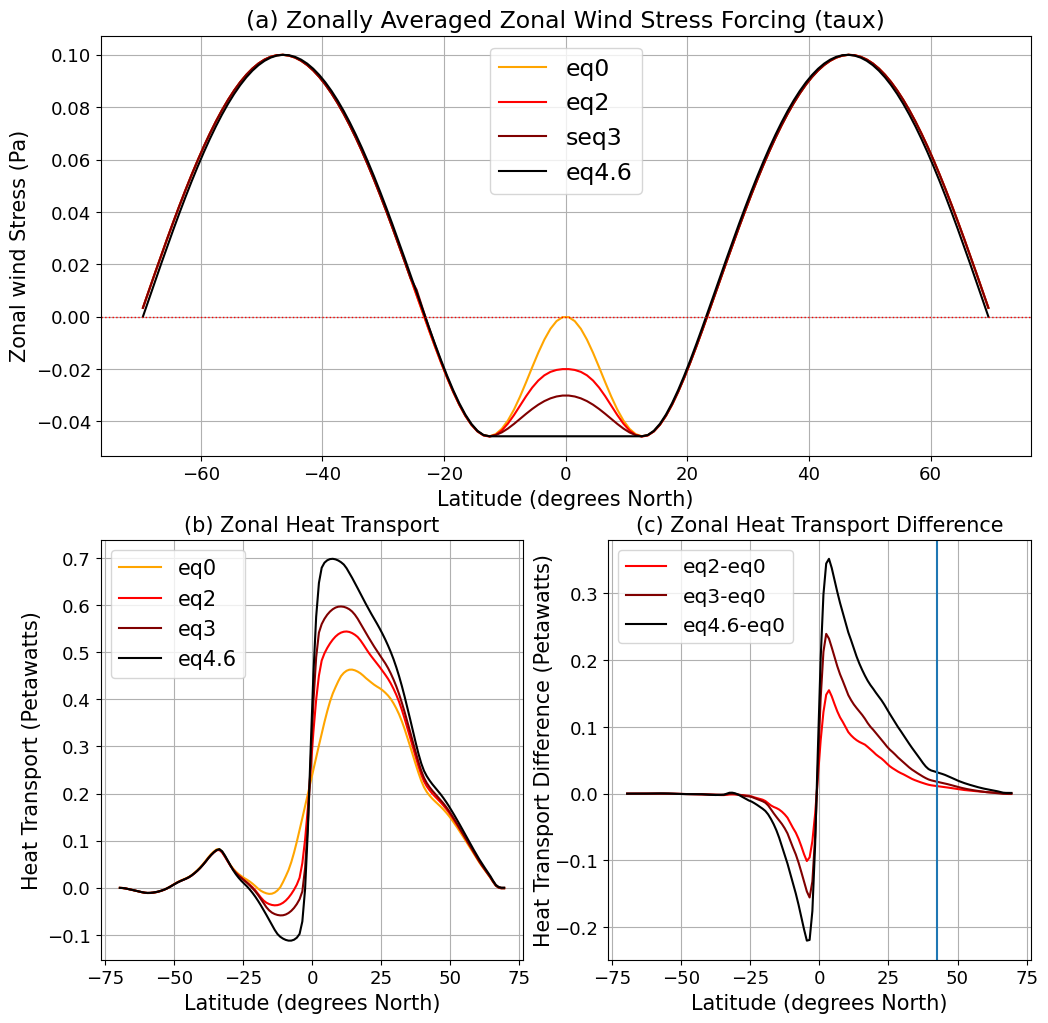

In [29]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[0.8, 0.8], height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ds_eq0_wind.taux.isel(xq=3).plot(ax=ax1,color='orange', label='eq0')
ds_eq2_wind.taux.isel(xq=3).plot(ax=ax1,color='red', linestyle='-', label='eq2')
ds_eq3_wind.taux.isel(xq=3).plot(ax=ax1,color='maroon', linestyle='-', label='seq3')
ds_eq4_wind.taux.isel(xq=3).plot(ax=ax1,color='black', linestyle='-', label='eq4.6')

ax1.grid()
ax1.set_title('(a) Zonally Averaged Zonal Wind Stress Forcing (taux)', fontsize=17)
ax1.set_xlabel('Latitude (degrees North)', fontsize=15)
ax1.set_ylabel('Zonal wind Stress (Pa)', fontsize=15)
ax1.tick_params(axis='both', labelsize=13)

ax1.legend(fontsize=17)
ax1.axhline(y=0, color='red', linestyle=':', linewidth=1, label='y = 0')

ax2 = fig.add_subplot(gs[1, 0])

heat_eq0.plot(ax=ax2,label='eq0', color="orange")
heat_eq2.plot(ax=ax2,label='eq2', color="red", linestyle='-')
heat_eq3.plot(ax=ax2,label='eq3', color="maroon")
heat_eq4.plot(ax=ax2,label='eq4.6', color="black", linestyle="-")

ax2.set_title('(b) Zonal Heat Transport', fontsize=15)
ax2.set_xlabel('Latitude (degrees North)', fontsize=15)
ax2.set_ylabel('Heat Transport (Petawatts)', fontsize=15)

ax2.tick_params(axis='both', labelsize=13)
ax2.legend(loc="upper left",fontsize=15)
ax2.grid()

ax3 = fig.add_subplot(gs[1, 1])

(heat_eq2-heat_eq0).plot(ax=ax3,color='red', label='eq2-eq0')
(heat_eq3-heat_eq0).plot(ax=ax3, color='maroon', label='eq3-eq0')
(heat_eq4-heat_eq0).plot(ax=ax3, color='black',label='eq4.6-eq0')
# plt.axhline(y=0.1)
plt.axvline(x=42.5)

ax3.set_title('(c) Zonal Heat Transport Difference', fontsize=15)
ax3.set_xlabel('Latitude (degrees North)', fontsize=15)
ax3.set_ylabel('Heat Transport Difference (Petawatts)', fontsize=15, labelpad=0.1)
# ax3.yaxis.set_ticks_position('right')
# ax3.yaxis.set_label_position('right')

ax3.legend(loc="upper left",fontsize=14.5)
ax3.tick_params(axis='both', labelsize=13)
ax3.grid()

plt.savefig('southlessheatandwind.png')


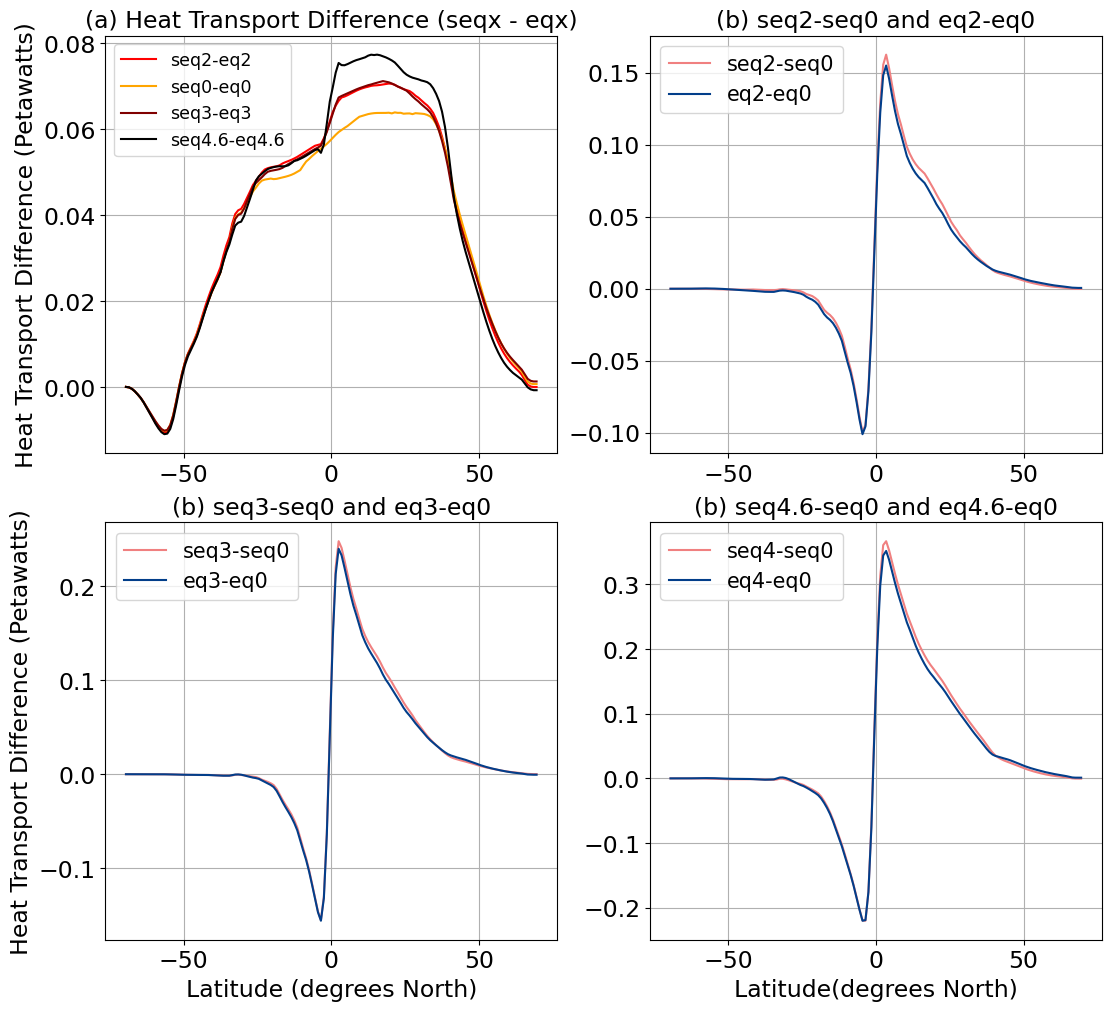

In [15]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(11,10))
(heat_seq2-heat_eq2).plot(ax=ax[0,0], color='red', label='seq2-eq2')
(heat_seq0-heat_eq0).plot(ax=ax[0,0], color='orange', label='seq0-eq0')
(heat_seq3-heat_eq3).plot(ax=ax[0,0], color='maroon', label='seq3-eq3')
(heat_scurl0-heat_eq4).plot(ax=ax[0,0], color='black', label='seq4.6-eq4.6')

ax[0,0].legend(loc="upper left",fontsize=12.5)
ax[0,0].grid()
ax[0,0].set_title('(a) Heat Transport Difference (seqx - eqx)', fontsize=17)
ax[0,0].tick_params(axis='both',labelsize=17)
ax[0,0].set_ylabel('Heat Transport Difference (Petawatts)', fontsize = 17)
ax[0,0].set_xlabel('', fontsize = 17)

(heat_seq2-heat_seq0).plot(ax=ax[0,1],color='lightcoral', label='seq2-seq0')
(heat_eq2-heat_eq0).plot(ax=ax[0,1],color='#023E8A', label='eq2-eq0')
ax[0,1].grid()
ax[0,1].legend(loc="upper left",fontsize=15)
ax[0,1].set_title('(b) seq2-seq0 and eq2-eq0', fontsize=17)
ax[0,1].tick_params(axis='both',labelsize=17)
ax[0,1].set_xlabel('', fontsize = 17)
ax[0,1].set_ylabel('', fontsize = 17)


(heat_seq3-heat_seq0).plot(ax=ax[1,0],color='lightcoral', label='seq3-seq0')
(heat_eq3-heat_eq0).plot(ax=ax[1,0],color='#023E8A', label='eq3-eq0')
ax[1,0].grid()
ax[1,0].legend(loc="upper left",fontsize=15)
ax[1,0].set_title('(b) seq3-seq0 and eq3-eq0', fontsize=17)
ax[1,0].tick_params(axis='both',labelsize=17)
ax[1,0].set_ylabel('Heat Transport Difference (Petawatts)', fontsize = 17)
ax[1,0].set_xlabel('Latitude (degrees North)', fontsize = 17)


(heat_scurl0-heat_seq0).plot(ax=ax[1,1],color='lightcoral', label='seq4-seq0')
(heat_eq4-heat_eq0).plot(ax=ax[1,1],color='#023E8A', label='eq4-eq0')
ax[1,1].grid()
ax[1,1].legend(loc="upper left",fontsize=15)
ax[1,1].set_title('(b) seq4.6-seq0 and eq4.6-eq0', fontsize=17)
ax[1,1].tick_params(axis='both',labelsize=17)
# ax[1,1].set_ylabel('Heat Transport Difference (Petawatts)', fontsize = 17)
ax[1,1].set_xlabel('Latitude(degrees North)', fontsize = 17)

plt.savefig('sex-eqx.png')